# Exercise 6

This week we will practice how to work with OpenStreetMap data and conduct network analysis in Python.

## Problem 1 (8 points)

There are two csv-files in the [/data](./data) folder:

- `origins.csv`
- `destinations.csv`

The files contain coordinates of the origin and destination points in certain area of the world as latitude and longitude coordinates (decimal degrees). 

**1: Your task is to find out where the points are located based on the coordinates found in the files** (which city/country?) Use your GIS skills to find out the solution in two different ways.

A. detect the location using **visualization techniques**; plot the points on top of a background map and see where they are located! 

In [2]:
import pandas as pd

origine = pd.read_csv("data\origins.csv")
origine
print(len(origine))

,x,y
0,10.148106,36.833607
1,10.195656,36.830997
2,10.177460,36.812308
3,10.112057,36.770930
4,10.205097,36.740122
5,10.205097,36.740122
6,10.191536,36.856823
7,10.115490,36.853115
8,10.175915,36.944267


B. Detect the location using **geocoding techniques**; reverse geocode at least one of the locations (see [hints from geopy documentation ](https://geopy.readthedocs.io/en/stable/index.html?highlight=reverse#module-geopy.geocoders)). As output, you should print out information about the location (can be a full address, or just the name of the city):

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

**2: Retrieve OpenStreetMap data (only streets that can be driven with car) from the area where the points are located.**

- Specify a Polygon that covers the **extent where all the points are located** 
- hint: combine the origin and destination points into one layer, and define a convex hull for the combined points
- store the polygon in a variable called `extent`

In [3]:
import pandas as pd 
from geopandas import GeoDataFrame
from shapely.geometry import Polygon,Point

data=pd.read_csv('data\origins1.csv')
data2=pd.read_csv('data\destinations1.csv')
geometry = [Point(xy) for xy in zip(data.x, data.y)]
geometry2 = [Point(xy) for xy in zip(data2.x, data2.y)]
origin = GeoDataFrame(data, crs={'init':'EPSG:4326','no_defs':True}, geometry=geometry)
destination = GeoDataFrame(data2, crs={'init':'EPSG:4326','no_defs':True}, geometry=geometry2)








C:\Users\mchebil\AppData\Local\Programs\Python\Python38\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


POINT (10.121133 36.898164)


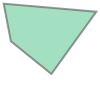

In [4]:
from shapely.geometry import MultiPoint
pts_list = data2['geometry'].tolist()
print(pts_list[0])
multi_point = MultiPoint(pts_list)
multi_point
extend_dest = multi_point.convex_hull
extend_dest

POINT (10.148106 36.833607)


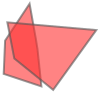

In [5]:
from shapely.geometry import MultiPoint,MultiPolygon
pts_list = data['geometry'].tolist()
print(pts_list[0])
multi_point = MultiPoint(pts_list)
multi_point
extend_orig = multi_point.convex_hull
extend_orig
multi_poly = MultiPolygon([extend_orig, extend_dest])
multi_poly

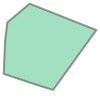

In [6]:
c1=multi_poly.convex_hull
c1

- Use the polygon to fetch the network data with `.graph_from_polygon()` function 
- see [osmnx docs](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.core.graph_from_polygon) for more details
- store the street network a variable called `graph`

In [6]:
import osmnx as ox
graph2= ox.graph_from_polygon(c1,network_type='drive')
#fig, ax = ox.plot_graph(graph2)

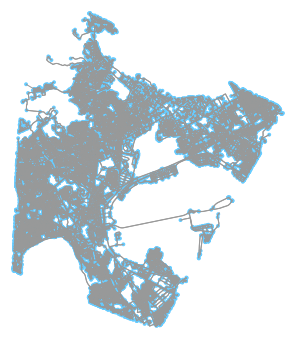

In [7]:
fig, ax = ox.plot_graph(graph2)

In [9]:
# NON-EDITABLE TEST CELL
# The graph should be a networkx MultiDiGraph
nodes, edges = ox.graph_to_gdfs(graph2)
edges.head()

,access,bridge,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v,width
0,NaN,NaN,"LINESTRING (10.1558655 36.8385901, 10.1560319 ...",residential,NaN,0,NaN,25.555,NaN,NaN,False,34395035,NaN,NaN,NaN,394919936,394919931,NaN
1,NaN,NaN,"LINESTRING (10.1558655 36.8385901, 10.1554981 ...",residential,NaN,0,NaN,40.114,NaN,NaN,False,34395041,NaN,NaN,NaN,394919936,394919937,NaN
2,NaN,NaN,"LINESTRING (10.1558655 36.8385901, 10.1556718 ...",residential,NaN,0,NaN,70.757,NaN,NaN,False,34395035,NaN,NaN,NaN,394919936,394919933,NaN
3,NaN,NaN,"LINESTRING (10.1554981 36.8383811, 10.1557531 ...",residential,NaN,0,NaN,41.614,NaN,NaN,False,34395035,NaN,NaN,NaN,394919937,394919934,NaN
4,NaN,NaN,"LINESTRING (10.1554981 36.8383811, 10.1552744 ...",residential,NaN,0,NaN,35.838,NaN,NaN,False,34395035,NaN,NaN,NaN,394919937,394919933,NaN


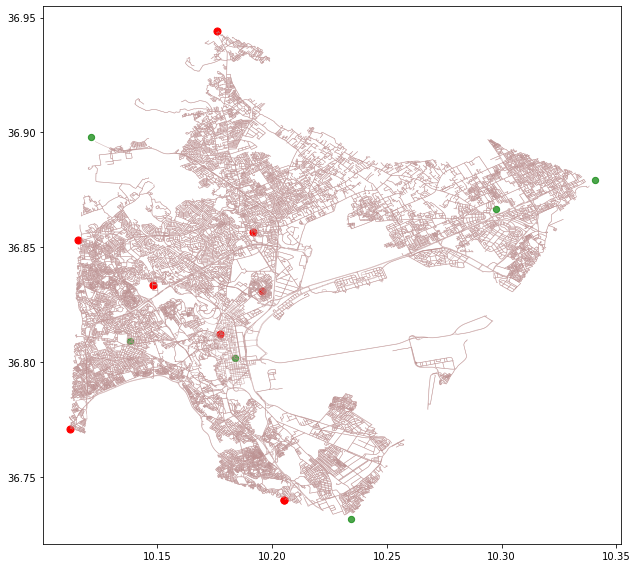

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))



# Plot street edges
edges.plot(ax=ax, linewidth=0.5, alpha=0.7,edgecolor='#BC8F8F')

# Plot buildings
origin.plot(ax=ax, facecolor='red', alpha=1, markersize=50)

# Plot restaurants
destination.plot(ax=ax, color='green', alpha=0.7, markersize=40)
plt.tight_layout()

**3: Reproject the data into UTM projection, and plot:**
  - the street network (with `gray` color and line width of `0.5` and alpha set to `0.7`)
  - the origin points (with `red` color)
  - destination points (with `blue` color)
  
In the end you should have a map that looks something like following:

![](img/route_network_with_OD_points.png)

In [11]:
edges.crs

'+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

In [14]:
print(edges['highway'].value_counts())

residential                     70442
tertiary                         6986
secondary                        2536
unclassified                     2250
primary                           922
trunk                             827
living_street                     498
trunk_link                        290
motorway_link                     246
motorway                          147
secondary_link                    100
primary_link                       78
tertiary_link                      45
[living_street, residential]        8
[trunk, trunk_link]                 4
[motorway_link, trunk]              2
[motorway_link, residential]        2
[motorway_link, motorway]           2
[secondary, primary_link]           2
[trunk, motorway]                   1
Name: highway, dtype: int64


In [12]:
graph_proj = ox.project_graph(graph2)
#fig, ax = ox.plot_graph(graph_proj)

In [13]:
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [14]:
print(nodes_proj.head())

          highway        lat        lon      osmid              x  \
394919936     NaN  36.838590  10.155866  394919936  603063.330410   
394919937     NaN  36.838381  10.155498  394919937  603030.850132   
993198080     NaN  36.888973  10.226181  993198080  609261.512686   
993198084     NaN  36.893097  10.231355  993198084  609716.669822   
993198085     NaN  36.884367  10.232815  993198085  609859.329992   

                      y                                     geometry  
394919936  4.077590e+06  POINT (603063.3304096293 4077590.232819065)  
394919937  4.077567e+06  POINT (603030.8501318834 4077566.650819882)  
993198080  4.083258e+06    POINT (609261.5126858146 4083257.7941147)  
993198084  4.083721e+06  POINT (609716.6698221194 4083721.251617903)  
993198085  4.082754e+06  POINT (609859.3299915316 4082754.373123616)  


In [15]:
print("Coordinate system:", edges_proj.crs)

Coordinate system: +proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +units=m +no_defs


NameError: name 'origin2' is not defined

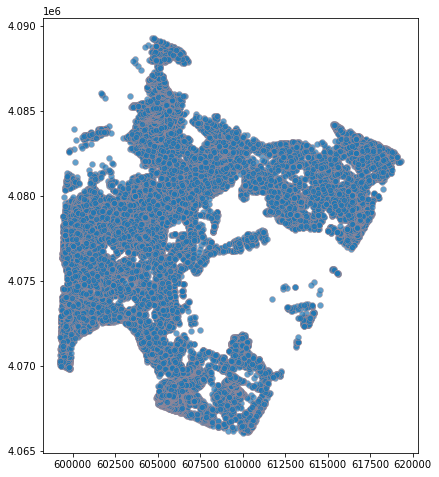

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))



# Plot street edges
nodes_proj.plot(ax=ax, linewidth=0.5, alpha=0.7,edgecolor='#BC8F8F')

# Plot buildings
origin2.plot(ax=ax, facecolor='red', alpha=1, markersize=50)

# Plot restaurants
origin2.plot(ax=ax, color='green', alpha=0.7, markersize=40)
plt.tight_layout()

In [19]:
# Calculate network statistics
stats = ox.basic_stats(graph_proj, circuity_dist='euclidean')
stats

{'n': 32199,
 'm': 85388,
 'k_avg': 5.30376719773906,
 'intersection_count': 29003,
 'streets_per_node_avg': 2.933134569396565,
 'streets_per_node_counts': {0: 0,
  1: 3196,
  2: 54,
  3: 24691,
  4: 4232,
  5: 19,
  6: 5,
  7: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.09925774092363117,
  2: 0.0016770707164818783,
  3: 0.7668250566787789,
  4: 0.1314326531879872,
  5: 0.0005900804372806609,
  6: 0.0001552843256001739,
  7: 6.211373024006956e-05},
 'edge_length_total': 6139812.780000005,
 'edge_length_avg': 71.90486696022866,
 'street_length_total': 3510594.407000029,
 'street_length_avg': 74.62522388028036,
 'street_segments_count': 47043,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.054026415198796,
 'self_loop_proportion': 0.001065723520869443,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

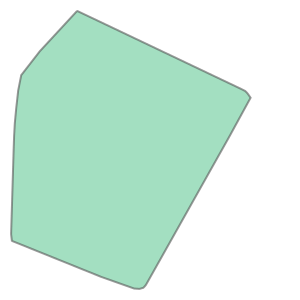

In [18]:

# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull
# Show output
convex_hull

### Done!

That's it! Now you can continue with problem 2. 

## Problem 2 (12 points)

In this problem we practice conducting shortest path routing.

### Steps

**1: Calculate the shortest paths between all origin points (16) and destination points (20) using the `length` of the road segments as the impedance measure (in total 320 routes).** 

- To be able to find the shortest paths, you should find the nearest nodes from the graph for both origin and destination points. 
- Notice: if the closest node is the same for both origin and destination point, you should skip the shortest path calculation. - After the routing, you should add the shortest path routes as LineString geometries into a GeoDataFrame called `routes`. 
- You should use the projected graph as the network for the analyses
- remember to use informative variable names, and to comment your code!

In [22]:
conda update pyproj -c conda-forge


Note: you may need to restart the kernel to use updated packages.
Traceback (most recent call last):
  File "C:\Users\wwwme\Anaconda3\Scripts\conda-script.py", line 11, in <module>
    from conda.cli import main
ModuleNotFoundError: No module named 'conda'


In [19]:
#target_xy = (target.y, target.x)
target_node = ox.get_nearest_node(graph_proj, (10.14811,36.83361), method='euclidean')
target_node

3009321397

In [20]:
origin

,x,y,geometry
0,10.148106,36.833607,POINT (10.148106 36.833607)
1,10.195656,36.830997,POINT (10.195656 36.830997)
2,10.177460,36.812308,POINT (10.17746 36.812308)
3,10.112057,36.770930,POINT (10.112057 36.77093)
4,10.205097,36.740122,POINT (10.205097 36.740122)
5,10.205097,36.740122,POINT (10.205097 36.740122)
6,10.191536,36.856823,POINT (10.191536 36.856823)
7,10.115490,36.853115,POINT (10.11549 36.853115)
8,10.175915,36.944267,POINT (10.175915 36.944267)


In [21]:
i=ox.get_nearest_node(graph_proj, (603063.330,4077590.233), method='euclidean')
print(i)

6570735538


In [22]:
origin2 = origin.to_crs(epsg=32632)
destination2 = destination.to_crs(epsg=32632)

In [23]:

import geopandas as gpd 

L=[]
for k in range(len(origin)):
    orig_node=(ox.get_nearest_node(graph_proj, (origin2.iloc[k]['geometry'].y,origin2.iloc[k]['geometry'].x), method='euclidean'))
    o_closest = nodes_proj.loc[orig_node]
    L.append(o_closest)

closest = gpd.GeoDataFrame(L, geometry='geometry', crs=nodes_proj.crs)
closest

,highway,lat,lon,osmid,x,y,geometry
368237700,NaN,36.833498,10.148017,368237700,602370.256710,4.077017e+06,POINT (602370.2567101698 4077016.939955052)
1185289805,NaN,36.830992,10.195794,1185289805,606634.267867,4.076791e+06,POINT (606634.2678669926 4076791.114339055)
1260351297,NaN,36.812183,10.177657,1260351297,605042.544536,4.074684e+06,POINT (605042.5445355125 4074684.412135356)
6582167085,NaN,36.770983,10.112286,6582167085,599264.675030,4.070044e+06,POINT (599264.6750300821 4070044.036058538)
285475631,NaN,36.740080,10.205522,285475631,607628.856058,4.066717e+06,POINT (607628.8560583188 4066716.543836042)
285475631,NaN,36.740080,10.205522,285475631,607628.856058,4.066717e+06,POINT (607628.8560583188 4066716.543836042)
1214214447,NaN,36.856557,10.191859,1214214447,606247.996795,4.079623e+06,POINT (606247.9967947474 4079622.883123836)
5328180002,NaN,36.853201,10.116760,5328180002,599557.428934,4.079170e+06,POINT (599557.4289338541 4079169.688922196)
1846266118,NaN,36.943664,10.175744,1846266118,604692.265120,4.089268e+06,POINT (604692.2651196419 4089268.482588365)


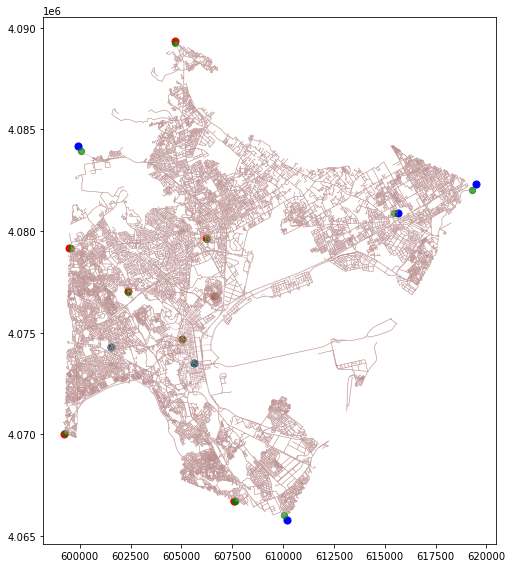

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))



# Plot street edges
edges_proj.plot(ax=ax, linewidth=0.5, alpha=0.7,edgecolor='#BC8F8F')

# Plot buildings
origin2.plot(ax=ax, facecolor='red', alpha=1, markersize=50)
# Plot buildings
destination2.plot(ax=ax, facecolor='blue', alpha=1, markersize=50)
# Plot restaurants
closest.plot(ax=ax, color='green', alpha=0.7, markersize=40)
closest_dest.plot(ax=ax, color='green', alpha=0.7, markersize=40)
plt.tight_layout()

In [25]:
destination2 = destination.to_crs(epsg=32632)
destination2

,x,y,geometry
0,10.121133,36.898164,POINT (599888.6763257916 4084162.268034444)
1,10.297556,36.866813,POINT (615655.2802911693 4080883.450943748)
2,10.234172,36.731472,POINT (610199.1686258956 4065794.24749791)
3,10.183752,36.801581,POINT (605600.7864515014 4073515.012093783)
4,10.138181,36.809006,POINT (601525.5044806373 4074289.356016768)
5,10.340667,36.879140,POINT (619478.8909689722 4082304.090754154)


In [26]:
d=[]
for k in range(len(destination2)):
    dest_node=(ox.get_nearest_node(graph_proj, (destination2.iloc[k]['geometry'].y,destination2.iloc[k]['geometry'].x), method='euclidean'))
    o_closest = nodes_proj.loc[dest_node]
    d.append(o_closest)

closest_dest = gpd.GeoDataFrame(d, geometry='geometry', crs=nodes_proj.crs)
closest_dest

,highway,lat,lon,osmid,x,y,geometry
291733394,motorway_junction,36.896060,10.122916,291733394,600050.314367,4.083931e+06,POINT (600050.3143665537 4083930.70211707)
1027977395,NaN,36.867032,10.295555,1027977395,615476.559821,4.080905e+06,POINT (615476.5598214854 4080905.3241927)
3009321397,NaN,36.733804,10.232331,3009321397,610031.423643,4.066051e+06,POINT (610031.4236428624 4066050.810320388)
1832204376,NaN,36.801690,10.183784,1832204376,605603.527517,4.073527e+06,POINT (605603.5275168587 4073527.117741316)
368243093,NaN,36.808957,10.138187,368243093,601526.086962,4.074284e+06,POINT (601526.0869620122 4074283.893035202)
1027847339,NaN,36.876703,10.338403,1027847339,619280.897444,4.082031e+06,POINT (619280.8974441598 4082030.866200977)


In [28]:
closest

,highway,lat,lon,osmid,x,y,geometry
368237700,NaN,36.833498,10.148017,368237700,602370.256710,4.077017e+06,POINT (602370.2567101698 4077016.939955052)
1185289805,NaN,36.830992,10.195794,1185289805,606634.267867,4.076791e+06,POINT (606634.2678669926 4076791.114339055)
1260351297,NaN,36.812183,10.177657,1260351297,605042.544536,4.074684e+06,POINT (605042.5445355125 4074684.412135356)
6582167085,NaN,36.770983,10.112286,6582167085,599264.675030,4.070044e+06,POINT (599264.6750300821 4070044.036058538)
285475631,NaN,36.740080,10.205522,285475631,607628.856058,4.066717e+06,POINT (607628.8560583188 4066716.543836042)
285475631,NaN,36.740080,10.205522,285475631,607628.856058,4.066717e+06,POINT (607628.8560583188 4066716.543836042)
1214214447,NaN,36.856557,10.191859,1214214447,606247.996795,4.079623e+06,POINT (606247.9967947474 4079622.883123836)
5328180002,NaN,36.853201,10.116760,5328180002,599557.428934,4.079170e+06,POINT (599557.4289338541 4079169.688922196)
1846266118,NaN,36.943664,10.175744,1846266118,604692.265120,4.089268e+06,POINT (604692.2651196419 4089268.482588365)


In [29]:
import networkx as nx 
p1=closest.iloc[0]['osmid']
p2=closest_dest.iloc[1]['osmid']
print(p1,p2)
route = nx.shortest_path(graph2, source=3009321397, target=1027977395, weight='length')

# Show what we have
print(route)
route

368237700 1027977395
[3009321397, 1226147131, 1077807670, 1077799339, 1077807038, 287297592, 287209032, 287297596, 1107724733, 1107725058, 1107725188, 1107724870, 1107725069, 1107724823, 1107724784, 287297604, 1107725273, 287297605, 1857568770, 1107724959, 1857568784, 1857568802, 1857568814, 329964945, 1107724961, 329965012, 1107724932, 1107725211, 1107724895, 1107725298, 1107725207, 1107725123, 6584638580, 287211733, 287211728, 6602385520, 621834691, 287211726, 6602385517, 287211725, 6617201099, 6617142466, 287211724, 287211722, 287211721, 287211717, 287211716, 287211715, 621834675, 6631271805, 287211711, 6782093321, 6782093348, 6782093373, 1672776507, 287227596, 6782093384, 287228138, 6640332230, 6581736837, 287837804, 1089664146, 1089665259, 1089666275, 1251963598, 371196358, 370530193, 370530191, 6617306274, 287837812, 1089663191, 1089666576, 1089666180, 6512944964, 3512551452, 1089662791, 1089666895, 1089663678, 6661164963, 1089664687, 1089665617, 1672776958, 1089663514, 108966476

[3009321397,
 1226147131,
 1077807670,
 1077799339,
 1077807038,
 287297592,
 287209032,
 287297596,
 1107724733,
 1107725058,
 1107725188,
 1107724870,
 1107725069,
 1107724823,
 1107724784,
 287297604,
 1107725273,
 287297605,
 1857568770,
 1107724959,
 1857568784,
 1857568802,
 1857568814,
 329964945,
 1107724961,
 329965012,
 1107724932,
 1107725211,
 1107724895,
 1107725298,
 1107725207,
 1107725123,
 6584638580,
 287211733,
 287211728,
 6602385520,
 621834691,
 287211726,
 6602385517,
 287211725,
 6617201099,
 6617142466,
 287211724,
 287211722,
 287211721,
 287211717,
 287211716,
 287211715,
 621834675,
 6631271805,
 287211711,
 6782093321,
 6782093348,
 6782093373,
 1672776507,
 287227596,
 6782093384,
 287228138,
 6640332230,
 6581736837,
 287837804,
 1089664146,
 1089665259,
 1089666275,
 1251963598,
 371196358,
 370530193,
 370530191,
 6617306274,
 287837812,
 1089663191,
 1089666576,
 1089666180,
 6512944964,
 3512551452,
 1089662791,
 1089666895,
 1089663678,
 6661164963,


In [30]:
route_nodes = nodes_proj.loc[route]
route_nodes

,highway,lat,lon,osmid,x,y,geometry
3009321397,NaN,36.733804,10.232331,3009321397,610031.423643,4.066051e+06,POINT (610031.4236428624 4066050.810320388)
1226147131,NaN,36.735107,10.230743,1226147131,609887.806672,4.066194e+06,POINT (609887.8066722016 4066193.603316508)
1077807670,NaN,36.741104,10.227580,1077807670,609596.811577,4.066855e+06,POINT (609596.8115766583 4066855.248384471)
1077799339,NaN,36.741390,10.227421,1077799339,609582.209686,4.066887e+06,POINT (609582.2096857183 4066886.738570897)
1077807038,NaN,36.741536,10.227351,1077807038,609575.769911,4.066903e+06,POINT (609575.7699109782 4066902.877500711)
287297592,NaN,36.742075,10.226929,287297592,609537.309165,4.066962e+06,POINT (609537.3091653239 4066962.166638471)
287209032,NaN,36.744075,10.226115,287209032,609461.828722,4.067183e+06,POINT (609461.8287215336 4067183.118842615)
287297596,NaN,36.744390,10.226071,287297596,609457.489005,4.067218e+06,POINT (609457.4890053679 4067217.991577239)
1107724733,NaN,36.745136,10.225988,1107724733,609448.947452,4.067301e+06,POINT (609448.9474519845 4067300.68714647)
1107725058,NaN,36.745836,10.225902,1107725058,609440.338293,4.067378e+06,POINT (609440.3382932091 4067378.211408896)


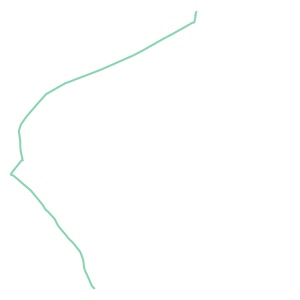

In [31]:

from shapely.geometry import LineString, Point

# Create a geometry for the shortest path
route_line = LineString(list(route_nodes.geometry.values))
route_line

In [41]:
route_nodes

,highway,lat,lon,osmid,x,y,geometry
3009321397,NaN,36.733804,10.232331,3009321397,610031.423643,4.066051e+06,POINT (610031.4236428624 4066050.810320388)
1226147131,NaN,36.735107,10.230743,1226147131,609887.806672,4.066194e+06,POINT (609887.8066722016 4066193.603316508)
1077807670,NaN,36.741104,10.227580,1077807670,609596.811577,4.066855e+06,POINT (609596.8115766583 4066855.248384471)
1077799339,NaN,36.741390,10.227421,1077799339,609582.209686,4.066887e+06,POINT (609582.2096857183 4066886.738570897)
1077807038,NaN,36.741536,10.227351,1077807038,609575.769911,4.066903e+06,POINT (609575.7699109782 4066902.877500711)
287297592,NaN,36.742075,10.226929,287297592,609537.309165,4.066962e+06,POINT (609537.3091653239 4066962.166638471)
287209032,NaN,36.744075,10.226115,287209032,609461.828722,4.067183e+06,POINT (609461.8287215336 4067183.118842615)
287297596,NaN,36.744390,10.226071,287297596,609457.489005,4.067218e+06,POINT (609457.4890053679 4067217.991577239)
1107724733,NaN,36.745136,10.225988,1107724733,609448.947452,4.067301e+06,POINT (609448.9474519845 4067300.68714647)
1107725058,NaN,36.745836,10.225902,1107725058,609440.338293,4.067378e+06,POINT (609440.3382932091 4067378.211408896)


In [42]:

geometry3 = [Point(xy) for xy in zip(route_nodes.lon, route_nodes.lat)]

rt = GeoDataFrame(route_nodes.osmid, crs={'init':'EPSG:4326','no_defs':True}, geometry=geometry3)


import mplleaflet
import matplotlib.pyplot as plt

ax2 = rt.plot(markersize = 20, color = "blue")
mplleaflet.display(fig=ax2.figure)


C:\Users\mchebil\AppData\Roaming\Python\Python37\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [32]:
p1=(closest.iloc[0]['geometry'].x,closest.iloc[0]['geometry'].y)
p2=(closest_dest.iloc[1]['geometry'].x,closest_dest.iloc[1]['geometry'].y)

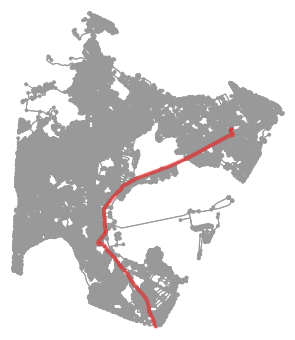

In [33]:
fig, ax = ox.plot_graph_route(graph2, route, origin_point=p1, destination_point=p2)

In [46]:
ox.save_graph_shapefile(graph2,filename='rrr')

In [53]:
i=ox.get_nearest_node(graph_proj, (606621.9540686276, 4076791.537230072), method='haversine')
print(i)

1178987348


**2: Calculate the distance of the routes in meters into a new column called `route_dist`.**
 

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

In [ ]:
# NON-EDITABLE TEST CELL
print("Shortest distance:", round(routes['route_dist'].min()), "meters")

In [ ]:
# NON-EDITABLE TEST CELL
print("Longest distance:", round(routes['route_dist'].max()), "meters")

**3: Plot all the routes on top of the street network.** 

In the end you should have something like following:
 
 ![](img/routings.png)

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

**4: Calculate the total distance of all the routes (i.e. sum of all route distances)** Update the `total_distance` based on your calculations:

In [ ]:
total_distance = 0

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

In [ ]:
# NON-EDITABLE TEST CELL
#Print your solution:
print("Total distance of all routes is: %.0f kilometers" % (total_distance / 1000))


### Done!

That's it! Now you have finished all the practical exercises of the course (except final assignment), congratulations! :)